In [1]:
from scipy.stats import bernoulli
from bandit import explore_then_commit, epsilon_greedy, ucb, run_bandit_algorithm, thompson_sampling, Bandit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### <font color='orange'> We are initializing a bandit instance which we will use for each bandit instance and reset it after each run (saves time in memory allocation of history array) </font>

<BarContainer object of 10 artists>

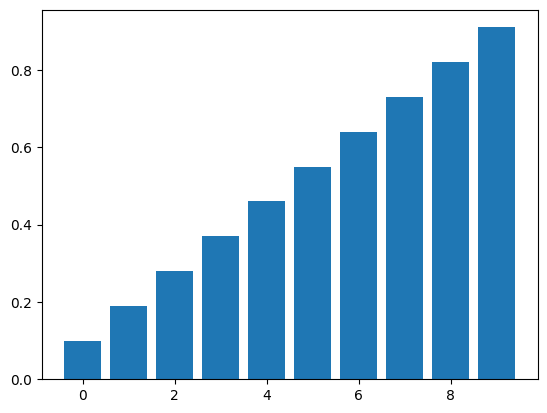

In [2]:
# means equally spaces between 0 and 1 exclusive
means = np.linspace(1/10, 1, 10, endpoint=False)
bernoullis = [bernoulli(mean) for mean in means]
n_rounds = 50000
berBandit = Bandit(bernoullis, n_rounds)
plt.bar(range(10), means)

#### <font color='orange'> Lets have a look at how each algorithm performs in one realization of a bandit run, one has to average across many such runs to get meaningful insights but one can still observe some key differences in how these algorithms operate this way. </font>

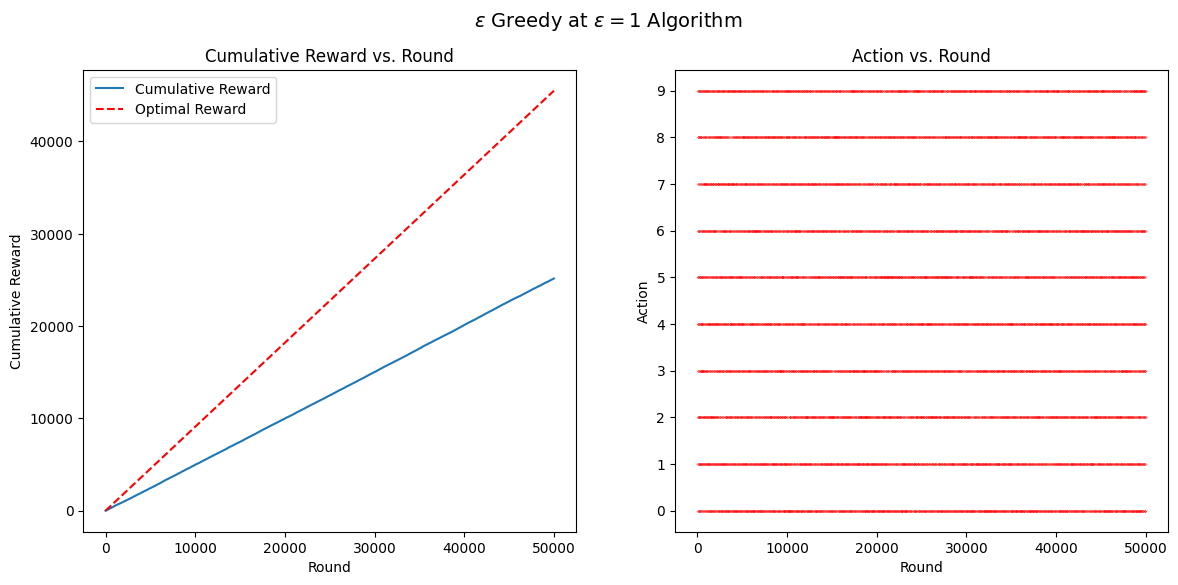

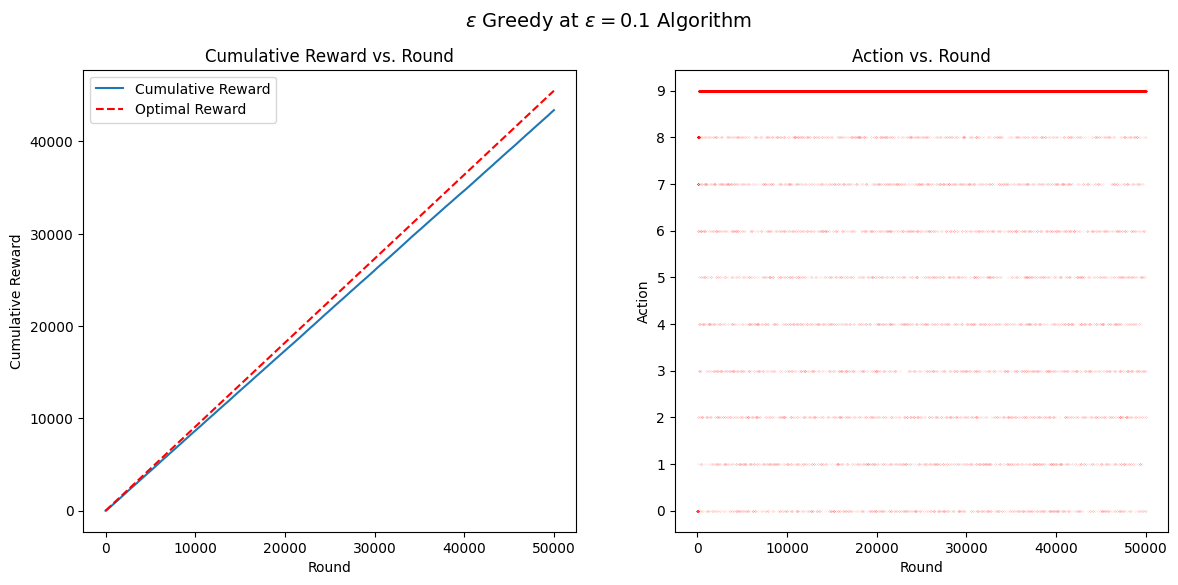

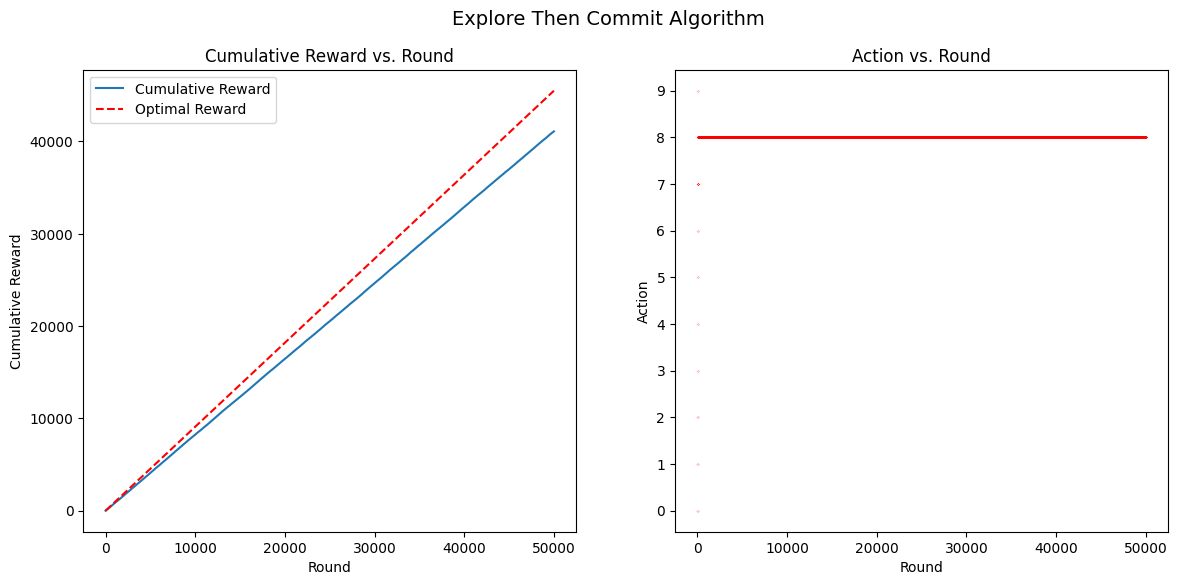

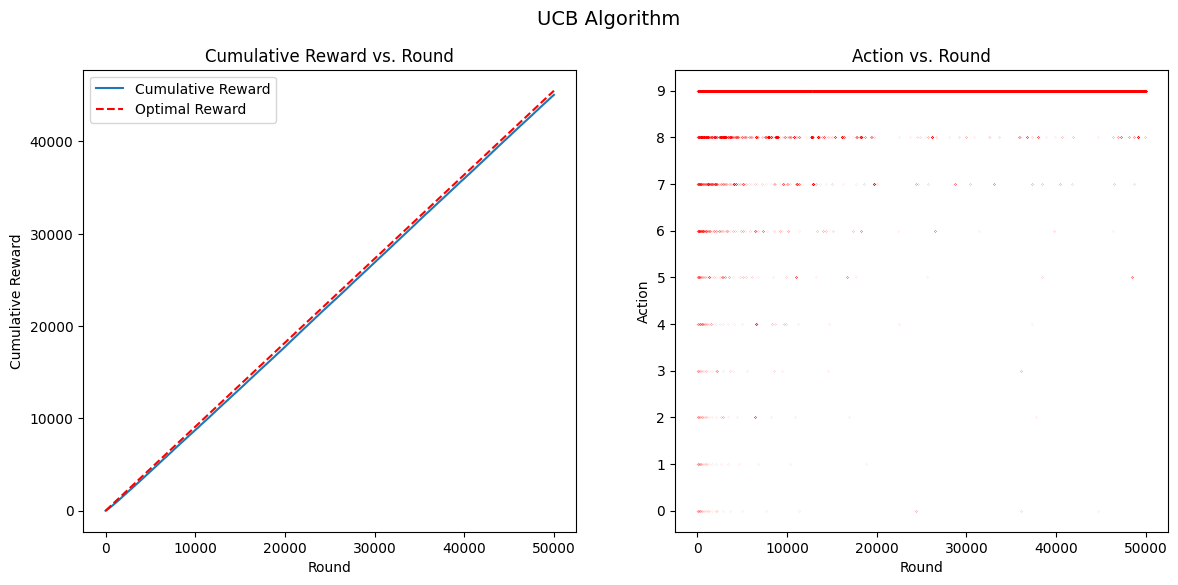

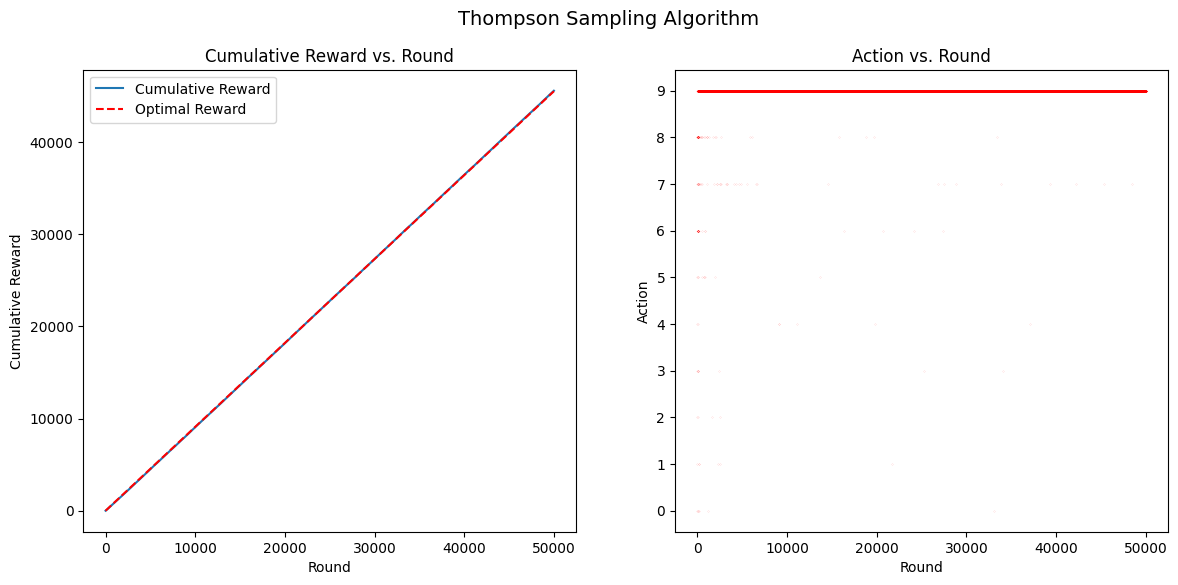

In [3]:
run_bandit_algorithm(r"$\epsilon$ Greedy at $\epsilon = 1$", epsilon_greedy, berBandit, n_rounds, 1, plot=True)
run_bandit_algorithm(r"$\epsilon$ Greedy at $\epsilon = 0.1$", epsilon_greedy, berBandit, n_rounds, 0.1, plot=True)
run_bandit_algorithm("Explore Then Commit", explore_then_commit, berBandit, n_rounds, 5, plot=True)
run_bandit_algorithm("UCB", ucb, berBandit, n_rounds, 1, plot=True)
run_bandit_algorithm("Thompson Sampling", thompson_sampling, berBandit, n_rounds, plot=True);

#### <font color='orange'> As expected the Epsilon-Greedy at Epsilon = 1 fails miserably, while at Epsilon = 1 is better but accumilates a lot of regret over time when compared to other algorithms. Then the Explore Then Commit usually gets the least amount of regret, especially in cases where it corretly identifies the best arm, but if it does not, as in this case, the regret is quite high. We also expect to see a lot of variability in regret for Explore Then Commit. UCB does a good job at minimizing regret, it does a lot of exploration initially but at higher time horizons, exploits a lot. Thompson Sampling seems to converge on the best arm quite quickly but we can conclude this only after running it on a lot of independent trials.</font>

#### <font color=orange> We perform 100 trials with Epsilon-Greedy at 1 and 0.1, Explore Then Commit, UCB and Thompson Sampling </font>

In [8]:
regrets = {
    r"$\epsilon$-Greedy at $\epsilon = 1$": [],
    r"$\epsilon$-Greedy at $\epsilon = 0.1$": [],
    "Explore Then Commit": [],
    "UCB": [],
    "Thompson Sampling": [],
}
n_trials = 100

In [9]:
for _ in range(n_trials):
    regrets[r"$\epsilon$-Greedy at $\epsilon = 1$"].append(
        run_bandit_algorithm(
            r"$\epsilon$-Greedy at $\epsilon = 1$",
            epsilon_greedy,
            berBandit,
            n_rounds,
            1,
        )
    )
    regrets[r"$\epsilon$-Greedy at $\epsilon = 0.1$"].append(
        run_bandit_algorithm(
            r"$\epsilon$-Greedy at $\epsilon = 1$",
            epsilon_greedy,
            berBandit,
            n_rounds,
            0.1,
        )
    )
    regrets["Explore Then Commit"].append(
        run_bandit_algorithm(
            "Explore Then Commit", explore_then_commit, berBandit, n_rounds, 5
        )
    )
    regrets["UCB"].append(run_bandit_algorithm("UCB", ucb, berBandit, n_rounds, 1))
    regrets["Thompson Sampling"].append(
        run_bandit_algorithm(
            "Thompson Sampling", thompson_sampling, berBandit, n_rounds
        )
    )

In [12]:
regret_df = pd.DataFrame(regrets)
regret_df.to_csv("regrets.csv")
regret_df

,$\epsilon$-Greedy at $\epsilon = 1$,$\epsilon$-Greedy at $\epsilon = 0.1$,Explore Then Commit,UCB,Thompson Sampling
0,20206.0,1996.0,-23.0,464.0,7.0
1,20216.0,1964.0,-34.0,613.0,42.0
2,20167.0,2252.0,3.0,557.0,52.0
3,20331.0,2119.0,49.0,761.0,32.0
4,20195.0,2152.0,8888.0,527.0,-32.0
...,...,...,...,...,...
95,20274.0,2347.0,-18.0,533.0,83.0
96,20180.0,2054.0,2.0,581.0,-49.0
97,20291.0,1933.0,4507.0,616.0,49.0
98,20339.0,2012.0,130.0,556.0,58.0


In [14]:
regret_df.describe()

,$\epsilon$-Greedy at $\epsilon = 1$,$\epsilon$-Greedy at $\epsilon = 0.1$,Explore Then Commit,UCB,Thompson Sampling
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,20254.91000,2085.020000,1057.970000,558.450000,49.700000
std,113.46268,118.692198,2537.469862,72.135027,66.928048
min,20003.00000,1897.000000,-132.000000,404.000000,-80.000000
25%,20170.75000,2013.500000,-2.250000,505.000000,2.000000
50%,20248.00000,2060.000000,51.000000,557.500000,48.500000
75%,20331.25000,2128.750000,97.750000,606.000000,83.500000
max,20604.00000,2598.000000,13431.000000,775.000000,239.000000


<Axes: title={'center': 'Average Regret'}>

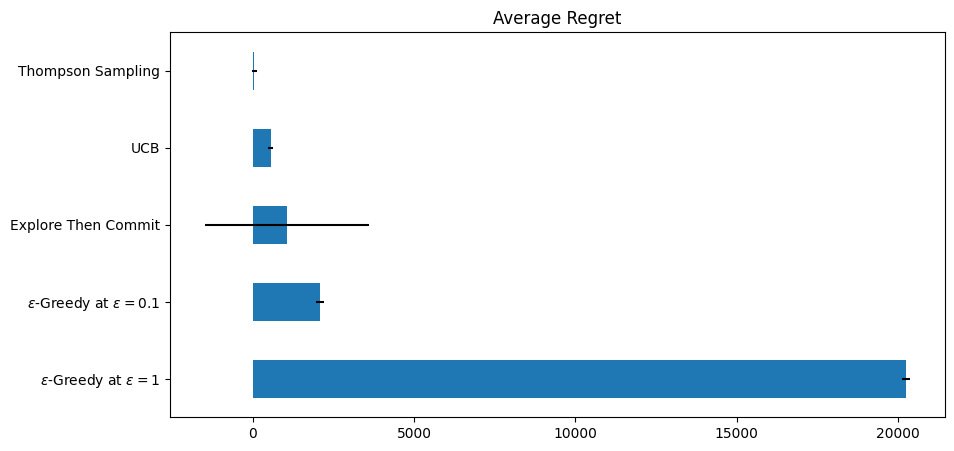

In [25]:
regret_df.mean().plot(kind="barh", title="Average Regret", xerr=regret_df.std(), figsize=(10, 5))

#### <font color='orange'> We see that Thompson Sampling outperforms all other algorithms, lets ignore the Epsilon-Greedy at 1 and visualize the regrets for a clearer view </font>

<Axes: title={'center': 'Average Regret'}>

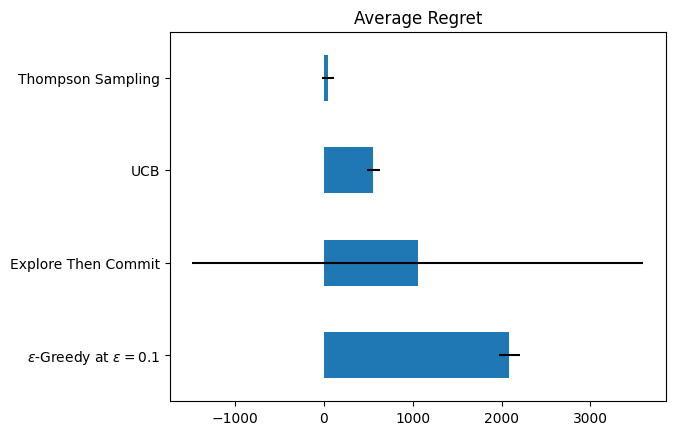

In [26]:
regret_df.drop(columns=r"$\epsilon$-Greedy at $\epsilon = 1$").mean().plot(kind="barh", title="Average Regret", xerr=regret_df.std())

#### <font color='orange'> Thompson's Sampling is the clear winner, while UCB is the second best. Explore Then Commit while showing better average cumulative regret than Epsilon-Greedy it's standard deviation is quite high, which in unfavourable. Epsilon-Greedy does not perform well in this case and probably requires a better finetuned value of Epsilon</font>

In [31]:
m = 2*np.log(n_rounds * means[-1] - means[-2])/(means[-1] - means[-2])

In [33]:
ETC_Reg = []
n_trials = 100

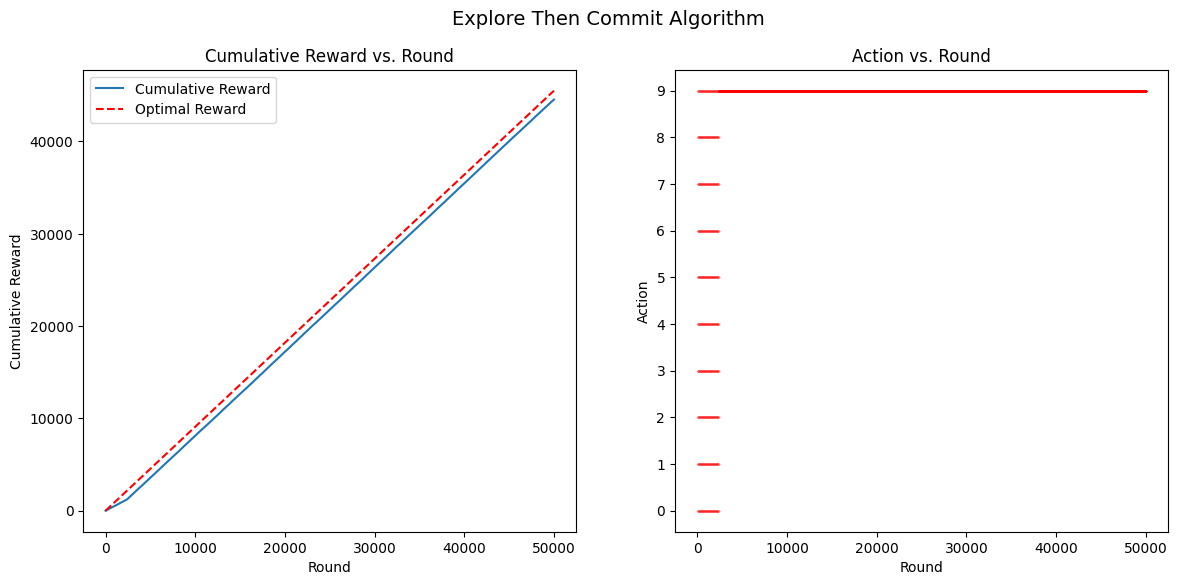

np.float64(957.9999999999927)

In [39]:
run_bandit_algorithm("Explore Then Commit", explore_then_commit, berBandit, n_rounds, m, plot=True)

In [40]:
for _ in range(n_trials):
    ETC_Reg.append(
        run_bandit_algorithm(
            "Explore Then Commit", explore_then_commit, berBandit, n_rounds, m
        )
    )

#### <font color='red'> ================ Please ignore the following exploratory analysis. ================ </font>

,0
count,104.000000
mean,971.442308
std,66.774192
min,844.000000
25%,920.750000
50%,973.000000
75%,1017.750000
max,1100.000000


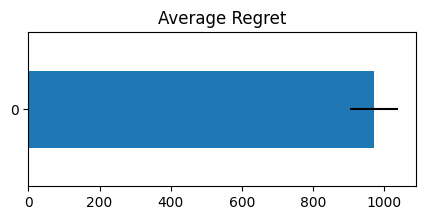

In [50]:
pd.DataFrame(ETC_Reg).mean().plot(kind="barh", title="Average Regret", xerr=pd.DataFrame(ETC_Reg).std(), figsize=(5, 2))
pd.DataFrame(ETC_Reg).describe()

#### <font color='orange'> If we finetune the exploration steps we get a much lower standard deviation and a slightly better reget, but it still falls short of algorithms like UCB and Thompson Sampling. </font>

In [56]:
EPS_Reg = []
berBandit.reset()
for eps in np.linspace(0.01, 0.03, 10):
    EPS_Reg.append(
        run_bandit_algorithm(
            r"$\epsilon$-Greedy at $\epsilon = 0.1$",
            epsilon_greedy,
            berBandit,
            n_rounds,
            eps,
        )
    )

<Axes: >

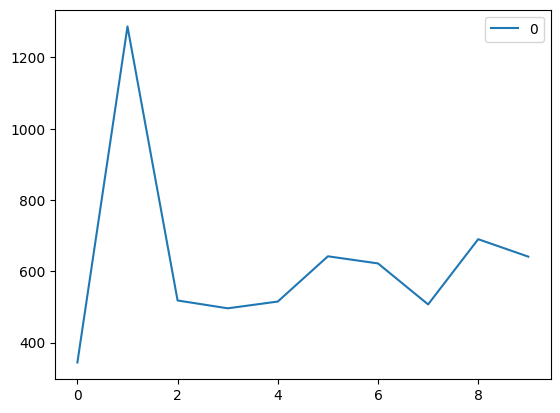

In [58]:
pd.DataFrame(EPS_Reg).plot()

#### <font color='orange'> If we finetune the exploration steps we get a much lower standard deviation and a slightly better reget, but it still falls short of algorithms like UCB and Thompson Sampling. </font>